<a href="https://colab.research.google.com/github/wairiukoirwine/ml_mini_project/blob/main/ml_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your CSV file:


Saving student_scores_50.csv to student_scores_50 (5).csv

Data loaded successfully.


,Name,Math,English,Science,Gender
0,Student1,90,96,87,F
1,Student2,51,71,79,M
2,Student3,60,53,92,F
3,Student4,87,97,89,F
4,Student5,79,61,99,M



Columns available: ['Name', 'Math', 'English', 'Science', 'Gender']

Enter feature column names separated by commas: science
Enter target column name: math

Linear Regression Results:
Mean Squared Error: 110.29210582273654
R-squared: 0.09477917085738241

Decision Tree Results:
Mean Squared Error: 266.8027777777778
R-squared: -1.1897798570073683

Predictions saved as predictions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

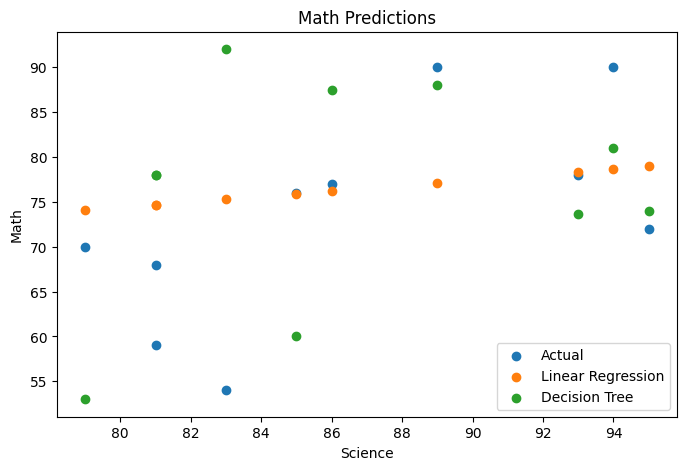

In [1]:
# ===================== IMPORT LIBRARIES =====================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from google.colab import files

# ===================== FILE UPLOAD =====================
print("Upload your CSV file:")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("\nData loaded successfully.")
display(df.head())

# ===================== SELECT FEATURES AND TARGET =====================
print("\nColumns available:", df.columns.tolist())

X_cols_input = input("\nEnter feature column names separated by commas: ").split(",")
X_cols_input = [col.strip() for col in X_cols_input if col.strip() != ""]  # Clean inputs
y_col_input = input("Enter target column name: ").strip()

# Create a dictionary for case-insensitive column lookup
column_mapping = {col.lower(): col for col in df.columns}

# Validate and map feature columns
validated_X_cols = []
for col_name in X_cols_input:
    col_lower = col_name.lower()
    if col_lower in column_mapping:
        validated_X_cols.append(column_mapping[col_lower])
    else:
        raise ValueError(f"Feature column '{col_name}' not found. Please check spelling and ensure it is one of: {', '.join(df.columns.tolist())}")
X_cols = validated_X_cols

# Validate and map target column
y_col_lower = y_col_input.lower()
if y_col_lower in column_mapping:
    y_col = column_mapping[y_col_lower]
else:
    raise ValueError(f"Target column '{y_col_input}' not found. Please check spelling and ensure it is one of: {', '.join(df.columns.tolist())}")

X = df[X_cols]
y = df[y_col]

# ===================== MAKE DATA NUMERIC =====================
# Convert feature columns to numeric, coercing non-numeric to NaN
X_numeric = X.apply(pd.to_numeric, errors='coerce')

# Convert target column to numeric, coercing non-numeric to NaN
y_numeric = pd.to_numeric(y, errors='coerce')

# Check if the target column became entirely NaN after coercion, indicating it was non-numeric
# and thus unsuitable for regression without proper encoding or model change.
if y_numeric.isnull().all() and not y.isnull().all():
    raise ValueError(
        f"Target column '{y_col}' contains non-numeric values (e.g., '{y.iloc[0]}') and cannot be used for regression in its current form. "
        "Please select a numeric target column or consider using classification models if you intend to predict categorical outcomes."
    )

# Combine X and y into a temporary DataFrame to drop rows with NaNs consistently
combined = pd.concat([X_numeric, y_numeric], axis=1)

# Drop rows where any value in the feature or (numeric) target columns is NaN
original_rows_count = combined.shape[0]
combined = combined.dropna()

if combined.shape[0] < original_rows_count:
    print(f"Warning: Dropped {original_rows_count - combined.shape[0]} rows due to non-numeric or missing values after conversion.")

# Update X and y with the cleaned numeric data
X = combined[X_cols]
y = combined[y_col]

# ===================== SPLIT DATA =====================
# Check if X or y are empty before splitting
if X.empty or y.empty:
    raise ValueError("No valid data remaining after numeric conversion and NaN removal. Please check your data and column selections.")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===================== LINEAR REGRESSION MODEL =====================
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

print("\nLinear Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))
print("R-squared:", r2_score(y_test, y_pred_lin))

# ===================== DECISION TREE MODEL =====================
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\nDecision Tree Results:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("R-squared:", r2_score(y_test, y_pred_tree))

# ===================== SAVE PREDICTIONS =====================
pred_df = pd.DataFrame({
    "Actual": y_test,
    "Linear_Regression_Prediction": y_pred_lin,
    "Decision_Tree_Prediction": y_pred_tree
})

pred_df.to_csv("predictions.csv", index=False)
print("\nPredictions saved as predictions.csv")

files.download("predictions.csv")

# ===================== VISUALIZE RESULTS =====================
if len(X_cols) == 1:
    plt.figure(figsize=(8, 5))
    plt.scatter(X_test[X_cols[0]], y_test, label='Actual')
    plt.scatter(X_test[X_cols[0]], y_pred_lin, label='Linear Regression')
    plt.scatter(X_test[X_cols[0]], y_pred_tree, label='Decision Tree')
    plt.xlabel(X_cols[0])
    plt.ylabel(y_col)
    plt.title(f"{y_col} Predictions")
    plt.legend()
    plt.show()
else:
    print("\nVisualization skipped because more than one feature was selected.")